In [13]:
import pandas as pd
import numpy as np
import math
import scipy
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Matplotlib and plotly modules
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
py.init_notebook_mode(connected=True)
%matplotlib inline


This system recommends movies based off of ratings. 

In [2]:
movies_data = pd.read_csv("C:\\Users\\Violet\\Desktop\\movies.csv")
movies_data.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings_data = pd.read_csv("C:\\Users\\Violet\\Desktop\\ratings.csv")
ratings_data.head(5)

,userId,movieId,rating,timestamp
0,3,1371,2.0,1306463561
1,4,1883,3.0,964622642
2,4,4166,4.0,986848700
3,6,61,5.0,845555454
4,6,310,2.0,845556119


In [4]:
all_data = pd.merge(ratings_data, movies_data, on='movieId') 
all_data.head() 


,userId,movieId,rating,timestamp,title,genres
0,3,1371,2.0,1306463561,Star Trek: The Motion Picture (1979),Adventure|Sci-Fi
1,18,1371,4.0,1455617646,Star Trek: The Motion Picture (1979),Adventure|Sci-Fi
2,19,1371,3.0,965709622,Star Trek: The Motion Picture (1979),Adventure|Sci-Fi
3,28,1371,4.0,1234334902,Star Trek: The Motion Picture (1979),Adventure|Sci-Fi
4,45,1371,3.0,950740619,Star Trek: The Motion Picture (1979),Adventure|Sci-Fi


In [5]:
#looking for missing values
all_data.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

In [25]:
# Calculate mean rating of all movies(raw means)
all_data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

In [31]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(all_data.groupby('userId')['rating'].mean())

sum_avg=ratings['num of ratings'] = pd.DataFrame(all_data.groupby('userId')['rating'].count()) 

ratings.head() 



,rating,num of ratings
userId,,
1,4.370690,232
2,3.948276,29
3,2.410256,39
4,3.555556,216
5,3.636364,44


In [33]:
movies_train_df, movies_test_df = train_test_split(all_data,
                                   stratify=all_data['rating'], 
                                   test_size=0.2,
                                   random_state=42)

print('# interactions on Train set: %d' % len(movies_train_df))
print('# interactions on Test set: %d' % len(movies_test_df))

# interactions on Train set: 80668
# interactions on Test set: 20168


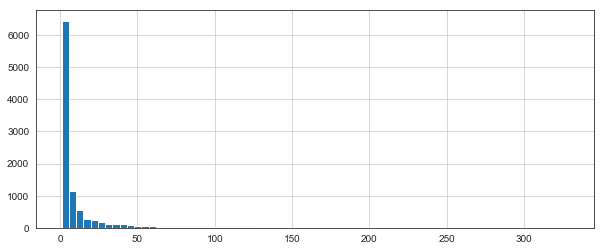

In [9]:
sns.set_style('white') 
# plot graph of 'num of ratings column' 
plt.figure(figsize =(10, 4)) 

ratings['num of ratings'].hist(bins = 70) 


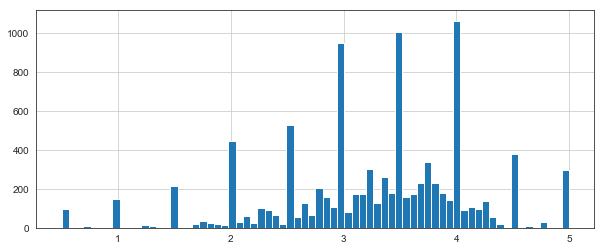

In [10]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 

ratings['rating'].hist(bins = 70) 


In [34]:
# Calculate mean rating of the train data
avg_train=movies_train_df.groupby('userId')['rating'].mean().sort_values(ascending=False)
avg_train.head()

userId
53     5.000000
515    4.904762
251    4.823529
30     4.791667
25     4.785714
Name: rating, dtype: float64

In [35]:
# Calculate mean rating of the train data
avg_test=movies_test_df.groupby('userId')['rating'].mean().sort_values(ascending=False)
avg_test.head()

userId
544    5.000000
533    5.000000
53     5.000000
251    5.000000
296    4.916667
Name: rating, dtype: float64

In [36]:
movies_mean_col = movies_train_df['rating'].mean(skipna = True)
movies_mean_row =  movies_train_df['userId'].mean(skipna = True)
print(movies_mean_col)
print(movies_mean_row)

3.5015371646749642
326.8195938910101


In [39]:
train_pred = movies_mean_col*len(movies_train_df)
train_pred


282462.0

In [42]:
# Calculate the bias for each user and each item.

movies_bias = movies_mean_col- avg_train
user_bias = movies_mean_row - avg_train
movies_bias.head()
user_bias.head()

userId
53     321.819594
515    321.914832
251    321.996064
30     322.027927
25     322.033880
Name: rating, dtype: float64

In [46]:
baseline_predictor=0+movies_bias+user_bias
baseline_predictor.head()

userId
53     320.321131
515    320.511607
251    320.674072
30     320.737798
25     320.749702
Name: rating, dtype: float64

In [48]:
average_bp=baseline_predictor.mean()
average_bp

323.00130792369697

TypeError: Expected sequence or array-like, got <class 'float'>